In [3]:
#import packages 

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats import linregress

In [4]:
ds = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'foram_cocco_workup')

data = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'COMPILED DATASET', header =1)

df = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'omegac_workup', header =1)



Index(['sample ID', 'description', 'depth', 'site no', 'size (um)',
       'sample mass used for analysis (g)', 'sample mass sieved (g)',
       'total bulk sample sieved', 'mass fraction',
       '               Start Time', '  End Time', '     Max 12CO2 (ppm)',
       '      12CO2 Integral', '      13CO2 Integral', '           Delta 13C',
       '      12CO2 Baseline', '      13CO2 Baseline', '           Threshold',
       'Number of data points', 'Time interval (seconds)', 'Unnamed: 20',
       'g CaCO3 in sample', 'g CaCO3/g sample', '%CaCO3',
       'peak 12CO2/sample mass', 'd13C (per mille)', 'd13C_err', 'size index',
       'total CaCO3 in sample', 'fraction of CaCO3 in each size fraction',
       'foram mass in sample', 'fraction of CaCO3 in forams', 'd13C foram',
       'Coccolithophores mass in sample', 'fraction of CaCO3 in cocco',
       'd13C cocco', 'Unnamed: 36'],
      dtype='object')


In [17]:
z = ds['depth ']
ff = ds['fraction of CaCO3 in forams']
cf = ds['fraction of CaCO3 in cocco']
fm = ds['foram mass in sample']
cm = ds['Coccolithophores mass in sample']
fc = ds['d13C foram']
cc = ds['d13C cocco']
station = ds['station']


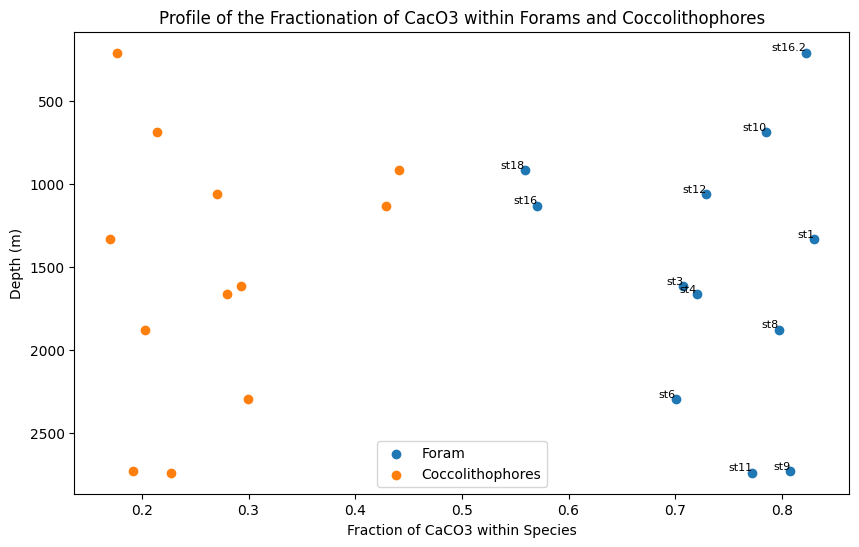

In [21]:
#foram fraction and cocco fraction vs depth 

plt.figure(figsize = (10,6))

plt.scatter(ff,z, label = 'Foram')
plt.scatter(cf,z, label = 'Coccolithophores')

# # calulate linear regression
# #foram
# slopef, interceptf, r_valuef, p_valuef, std_errf = linregress(ff, z)
# regression_yf = slopef * ff + interceptf
# r_squaredf = r_valuef**2
# #cocco
# slopec, interceptc, r_valuec, p_valuec, std_errc = linregress(cf, z)
# regression_yc = slopec * cf + interceptc
# r_squaredc = r_valuec**2

# #plot linear regression
# #foram
# plt.plot(ff, regression_yf, label=f'(R²={r_squaredf:.2f})), (p={p_valuef:.2e}), (slope={slopef:.2f})', color='b', linestyle='--')
# #cocco
# plt.plot(cf, regression_yc, label=f'(R²={r_squaredc:.2f})), (p={p_valuec:.2e}), (slope={slopec:.2f})', color='orange', linestyle='--')

# add station labels to each data point
for x, y, label in zip(ff, z, station):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')


plt.xlabel('Fraction of CaCO3 within Species')
plt.ylabel('Depth (m)')
plt.title('Profile of the Fractionation of CacO3 within Forams and Coccolithophores')

plt.gca().invert_yaxis()
plt.legend(loc = 'lower center')

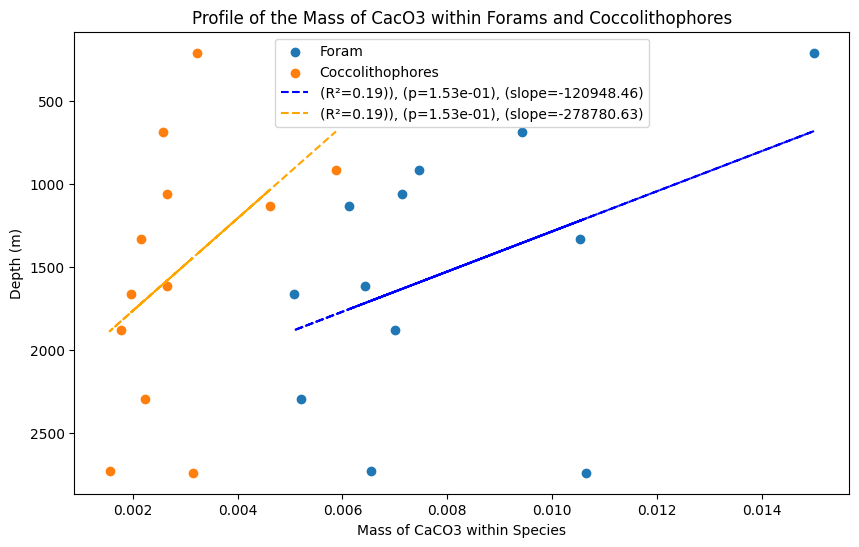

In [23]:
#foram fraction and cocco fraction vs depth 

plt.figure(figsize = (10,6))

plt.scatter(fm,z, label = 'Foram')
plt.scatter(cm,z, label = 'Coccolithophores')

plt.xlabel('Mass of CaCO3 within Species')
plt.ylabel('Depth (m)')
plt.title('Profile of the Mass of CacO3 within Forams and Coccolithophores')

# calulate linear regression
#foram
slopef, interceptf, r_valuef, p_valuef, std_errf = linregress(fm, z)
regression_yf = slopef * fm + interceptf
r_squaredf = r_valuef**2
#cocco
slopec, interceptc, r_valuec, p_valuec, std_errc = linregress(cm, z)
regression_yc = slopec * cm + interceptc
r_squaredc = r_valuec**2

#plot linear regression
#foram
plt.plot(fm, regression_yf, label=f'(R²={r_squaredf:.2f})), (p={p_valuef:.2e}), (slope={slopef:.2f})', color='b', linestyle='--')
#cocco
plt.plot(cm, regression_yc, label=f'(R²={r_squaredc:.2f})), (p={p_valuec:.2e}), (slope={slopec:.2f})', color='orange', linestyle='--')



plt.gca().invert_yaxis()
plt.legend()


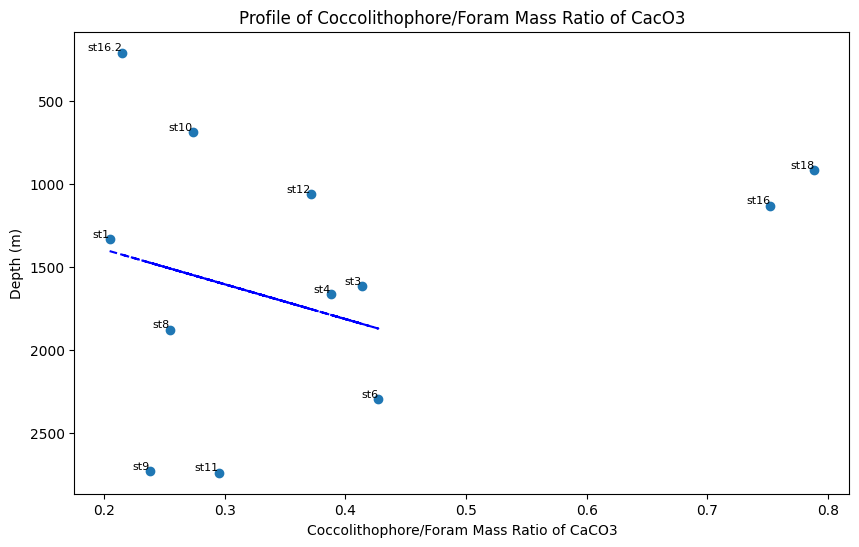

In [25]:
mratio = cm/fm

station = ds['station']
mratio2 = mratio.iloc[[0,1,2,3,4,5,6,7,8,10]]
z2 = z.iloc[[0,1,2,3,4,5,6,7,8,10]]


plt.figure(figsize = (10,6))

plt.scatter(mratio,z)

plt.xlabel('Coccolithophore/Foram Mass Ratio of CaCO3')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore/Foram Mass Ratio of CacO3')

#linear regression
slopemr, interceptmr, r_valuemr, p_valuemr, std_errmr = linregress(mratio2, z2)
regression_ymr = slopemr * mratio2 + interceptmr
r_squaredmr = r_valuemr**2

#plot linear regression
#foram
plt.plot(mratio2, regression_ymr, label=f'(R²={r_squaredmr:.2f})), (p={p_valuemr:.2e}), (slope={slopemr:.2f})', color='b', linestyle='--')



# add station labels to each data point
for x, y, label in zip(mratio, z, station):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')


plt.gca().invert_yaxis()


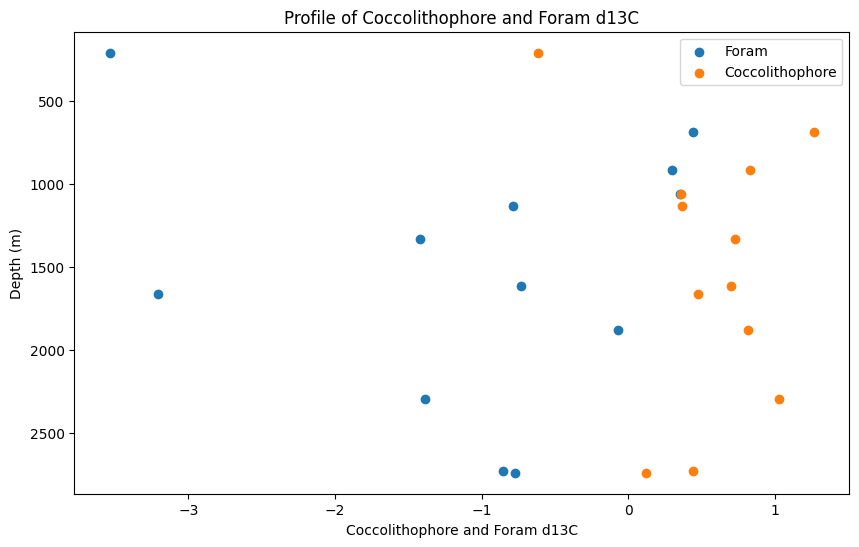

In [27]:


plt.figure(figsize = (10,6))

plt.scatter(fc,z, label='Foram')
plt.scatter(cc,z, label='Coccolithophore')

plt.xlabel('Coccolithophore and Foram d13C')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore and Foram d13C')


plt.gca().invert_yaxis()
plt.legend()

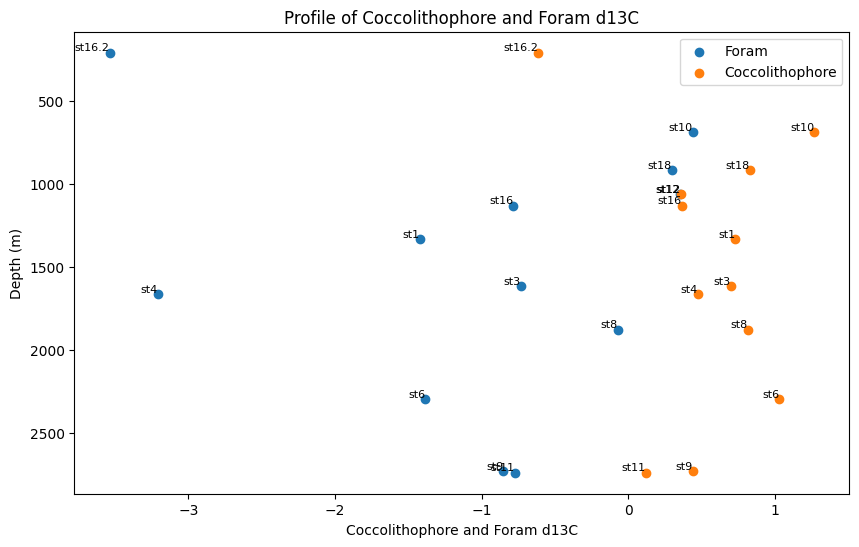

In [29]:


plt.figure(figsize = (10,6))

plt.scatter(fc,z, label='Foram')
plt.scatter(cc,z, label='Coccolithophore')

for x, y, label in zip(fc, z, station):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

for x, y, label in zip(cc, z, station):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.xlabel('Coccolithophore and Foram d13C')
plt.ylabel('Depth (m)')
plt.title('Profile of Coccolithophore and Foram d13C')

plt.gca().invert_yaxis()
plt.legend()


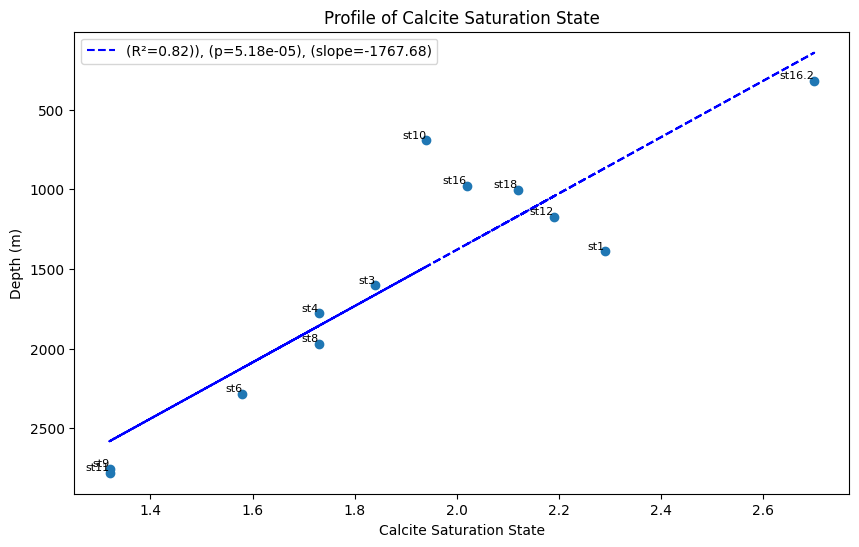

In [31]:
omegac = df['omega C']
d = df['depth .1']
st = df['station']



plt.figure(figsize=(10,6))

plt.scatter(omegac,d)

# add station labels to each data point
for x, y, label in zip(omegac, d, st):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

#calc linear regression
slopeo, intercepto, r_valueo, p_valueo, std_erro = linregress(omegac, d)
regression_yo = slopeo * omegac + intercepto
r_squaredo = r_valueo**2
#plot linear regression
plt.plot(omegac, regression_yo, label=f'(R²={r_squaredo:.2f})), (p={p_valueo:.2e}), (slope={slopeo:.2f})', color='b', linestyle='--')


plt.xlabel('Calcite Saturation State')
plt.ylabel('Depth (m)')
plt.title('Profile of Calcite Saturation State')

plt.gca().invert_yaxis()
plt.legend()

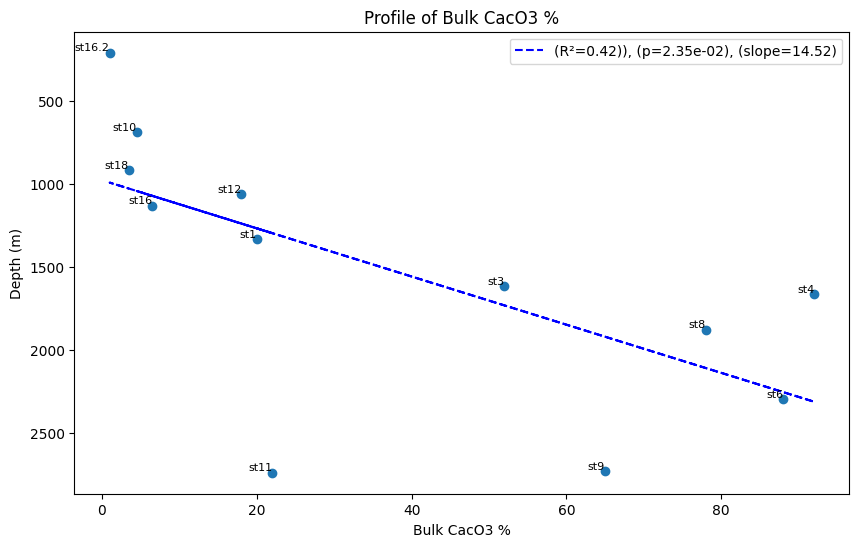

In [33]:
caco3 = ds['%CaCO3 (prelim)']


plt.figure(figsize=(10,6))

plt.scatter(caco3,z)

# add station labels to each data point
for x, y, label in zip(caco3, z, station):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

#calc linear regression
slopeo, intercepto, r_valueo, p_valueo, std_erro = linregress(caco3, z)
regression_yo = slopeo * caco3 + intercepto
r_squaredo = r_valueo**2
#plot linear regression
plt.plot(caco3, regression_yo, label=f'(R²={r_squaredo:.2f})), (p={p_valueo:.2e}), (slope={slopeo:.2f})', color='b', linestyle='--')


plt.xlabel('Bulk CacO3 %')
plt.ylabel('Depth (m)')
plt.title('Profile of Bulk CacO3 %')

plt.gca().invert_yaxis()
plt.legend()

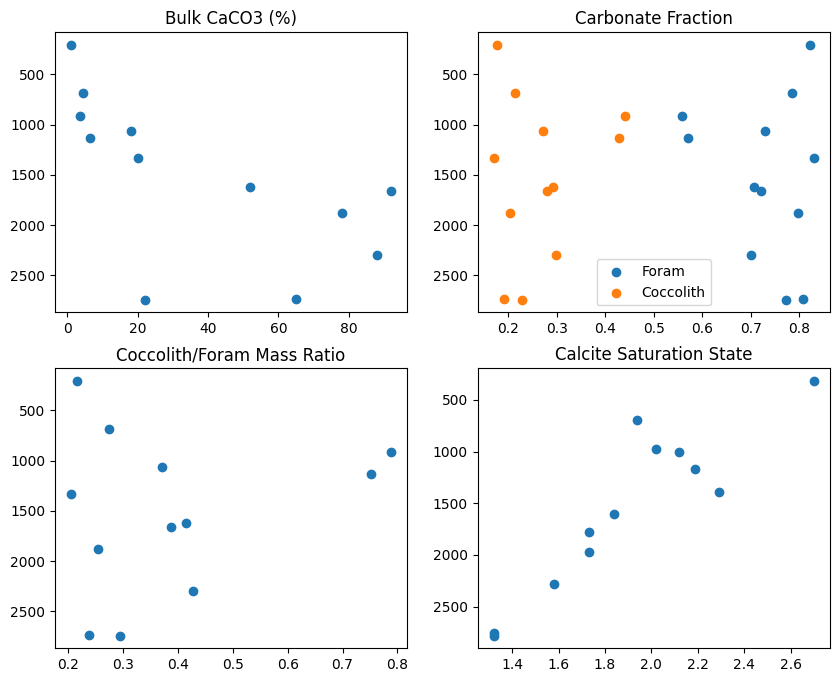

In [35]:
fig, (axes) = plt.subplots(2,2, figsize =(10,8))

axes[0,0].scatter(caco3,z)

axes[0,1].scatter(ff,z, label = 'Foram')
axes[0,1].scatter(cf,z, label = 'Coccolith')

axes[1,0].scatter(mratio,z)

axes[1,1].scatter(omegac,d)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()

axes[0,0].set_title('Bulk CaCO3 (%)')
axes[0,1].set_title('Carbonate Fraction')
axes[1,0].set_title('Coccolith/Foram Mass Ratio')
axes[1,1].set_title('Calcite Saturation State')

axes[0,1].legend()



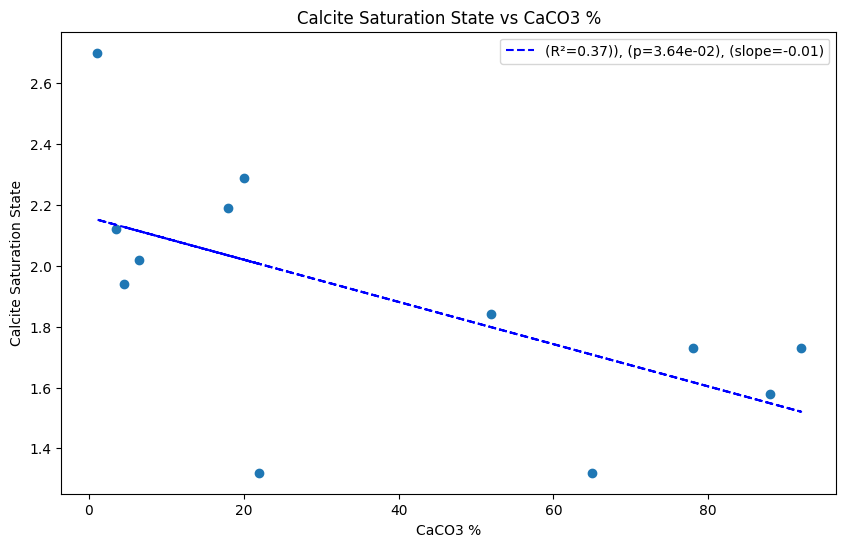

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(caco3, omegac)

#calc linear regression
slopeo, intercepto, r_valueo, p_valueo, std_erro = linregress(caco3, omegac)
regression_yo = slopeo * caco3 + intercepto
r_squaredo = r_valueo**2
#plot linear regression
plt.plot(caco3, regression_yo, label=f'(R²={r_squaredo:.2f})), (p={p_valueo:.2e}), (slope={slopeo:.2f})', color='b', linestyle='--')

plt.xlabel('CaCO3 %')
plt.ylabel('Calcite Saturation State')
plt.title('Calcite Saturation State vs CaCO3 %')
plt.legend()


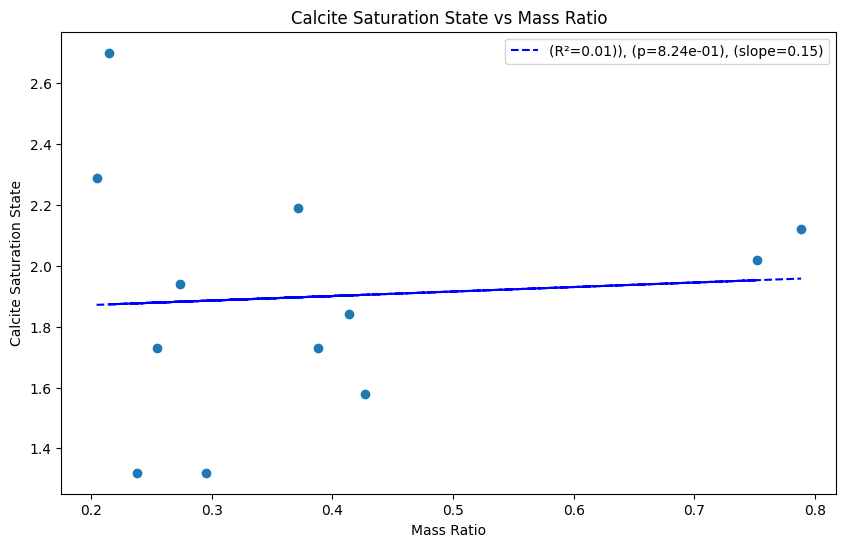

In [39]:
plt.figure(figsize=(10,6))

plt.scatter(mratio, omegac)

#calc linear regression
slopeo, intercepto, r_valueo, p_valueo, std_erro = linregress(mratio, omegac)
regression_yo = slopeo * mratio + intercepto
r_squaredo = r_valueo**2
#plot linear regression
plt.plot(mratio, regression_yo, label=f'(R²={r_squaredo:.2f})), (p={p_valueo:.2e}), (slope={slopeo:.2f})', color='b', linestyle='--')

plt.xlabel('Mass Ratio')
plt.ylabel('Calcite Saturation State')
plt.title('Calcite Saturation State vs Mass Ratio')
plt.legend()


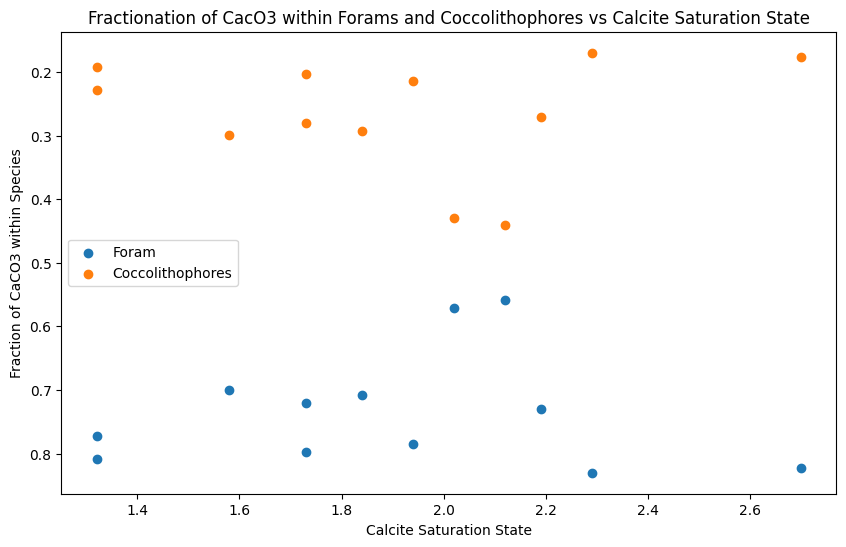

In [41]:
#foram fraction and cocco fraction vs depth 

plt.figure(figsize = (10,6))

plt.scatter(omegac, ff , label = 'Foram')
plt.scatter(omegac, cf, label = 'Coccolithophores')





plt.ylabel('Fraction of CaCO3 within Species')
plt.xlabel('Calcite Saturation State')
plt.title('Fractionation of CacO3 within Forams and Coccolithophores vs Calcite Saturation State')

plt.gca().invert_yaxis()
plt.legend(loc = 'center left')

